### Objective: It is a binary classification problem and analysis the previous record of customer, to identify the customer get the loan or not.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### dataset link: https://www.kaggle.com/aniruddhachoudhury/esigning-of-loan-based-on-financial-history?select=financial_data.csv

In [2]:
# Import dataset
dataset = pd.read_csv(r'N:\Projects\Machine Learning Project\E Signing of Loan Based on Financial History\financial_data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
dataset.shape

(17908, 21)

In [6]:
# Dataset information.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [7]:
# Check dataset having any null values.
dataset.isnull().values.any()

False

In [8]:
# Sum of null values in dataset.
dataset.isnull().values.sum()

0

In [9]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [10]:
# categorical columns.
dataset.select_dtypes(include='object').columns

Index(['pay_schedule'], dtype='object')

In [11]:
# Number of categorical columns.
len(dataset.select_dtypes(include='object').columns)

1

In [12]:
# unique values in categorical column.
dataset['pay_schedule'].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [13]:
# Number of unique values in categorical column.
dataset['pay_schedule'].nunique()

4

In [14]:
dataset.shape

(17908, 21)

In [15]:
# Encoding the categorical data.
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [16]:
dataset.shape

(17908, 23)

In [17]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [18]:
# check the number of categorical data.
len(dataset.select_dtypes(include='object').columns)

0

<AxesSubplot:xlabel='e_signed', ylabel='count'>

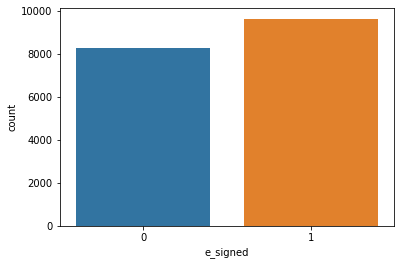

In [19]:
# Countplot
sns.countplot(dataset['e_signed'])

In [20]:
# e signed values
(dataset.e_signed==1).sum()

9639

In [21]:
(dataset.e_signed==0).sum()

8269

## Restructure the dataset

In [22]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [23]:
# Concatenate two columns months_employed and years_employed.
dataset['months employed'] = (dataset.months_employed+dataset.years_employed*12)

In [24]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed
0,7629673,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [25]:
# Drop columns months_employed and years_employed.
dataset = dataset.drop(columns=['months_employed', 'years_employed'])

In [26]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed
0,7629673,40,1,3135,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,3560428,61,0,3180,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,6934997,23,0,1540,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,5682812,40,0,5230,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,5335819,33,0,3590,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [27]:
# Concatenate two columns personal_account_m and personal_account_y.
dataset['personal account months'] = (dataset.personal_account_m+dataset.personal_account_y*12)

In [28]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personal account months
0,7629673,40,1,3135,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [29]:
# Drop two columns personal_account_m and personal_account_y.
dataset = dataset.drop(columns=['personal_account_m', 'personal_account_y'])

In [30]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [31]:
# dataset_2 having all independent features.
dataset_2 = dataset.drop(columns=['entry_id', 'e_signed'])

<AxesSubplot:title={'center':'correlated with e-signed'}>

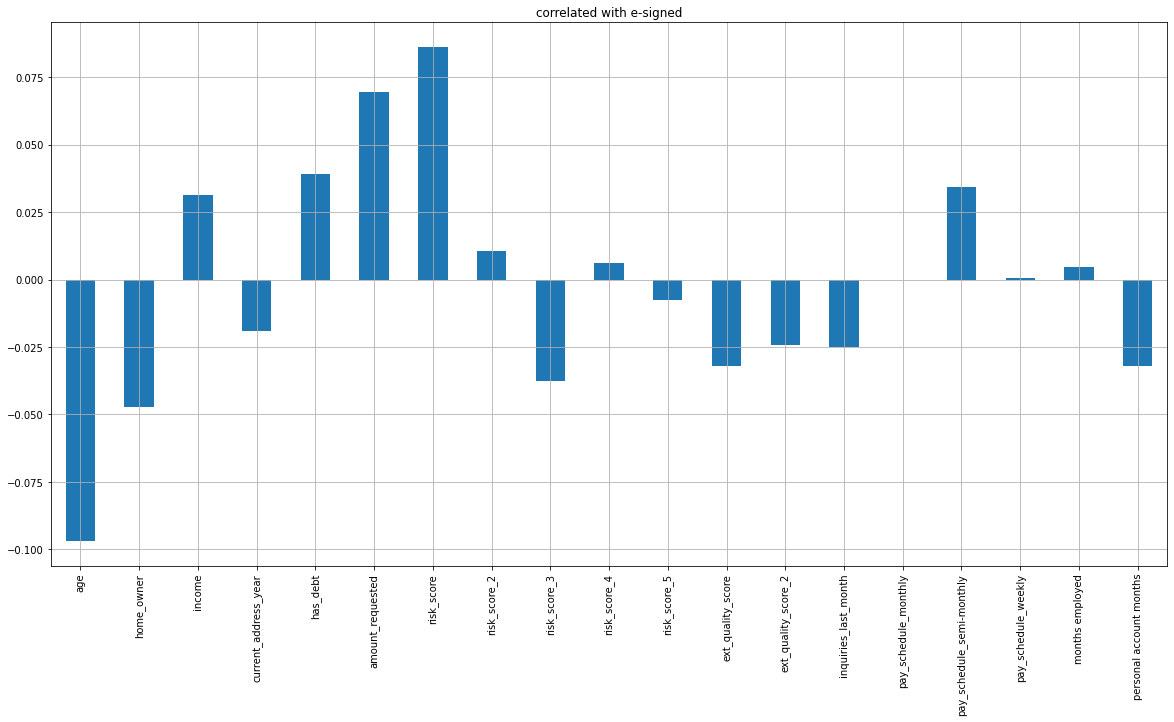

In [32]:
# Correlation between dependent and independent features.
dataset_2.corrwith(dataset['e_signed']).plot.bar(figsize=(20,10), title='correlated with e-signed', grid=True)

<AxesSubplot:>

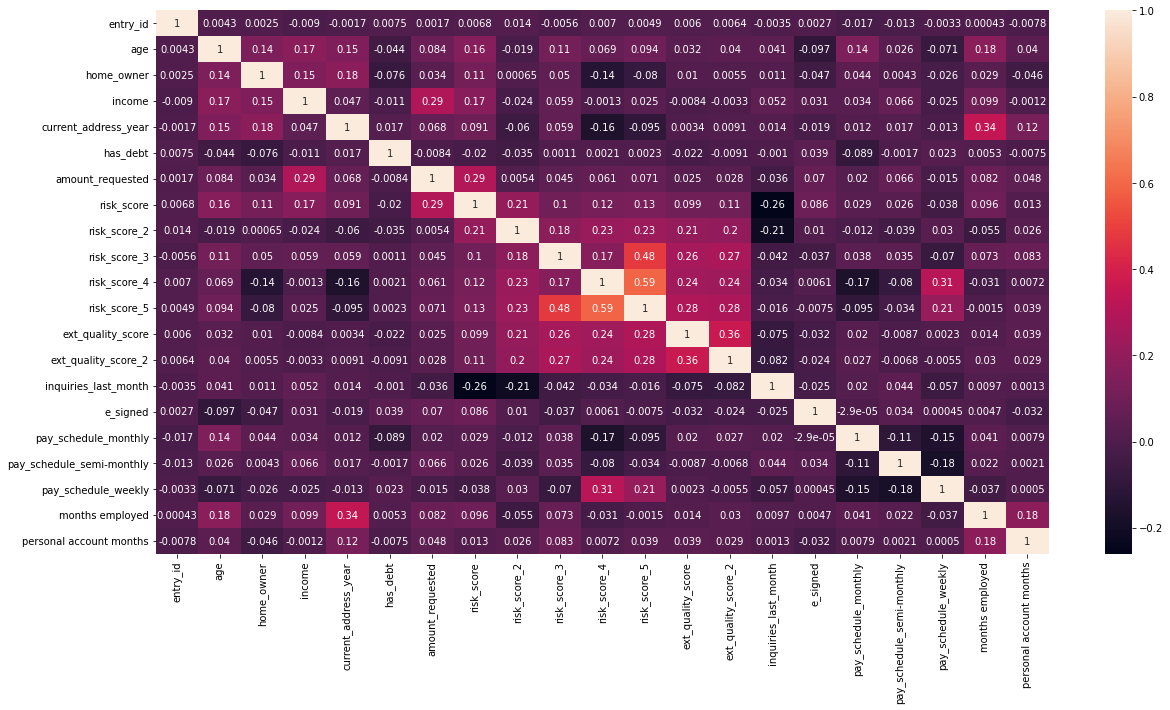

In [33]:
## heatmap
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True)

## Splitting the dataset

In [34]:
dataset.head()

,entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personal account months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [35]:
# x contain all independent features.
x = dataset.drop(columns=['entry_id', 'e_signed'])

In [36]:
# y contain dependent feature.
y = dataset['e_signed']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Splitting the dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [39]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Building The Model

In [40]:
# 1: Logistic regression
from sklearn.linear_model import LogisticRegression

In [41]:
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train, y_train)

LogisticRegression()

In [42]:
y_pred = classifier_lr.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
# accuracy score of Logistic Regression.
accuracy_score(y_test, y_pred)

0.5628140703517588

In [45]:
# Confusion matrix of Logistic Regression.
confusion_matrix(y_test, y_pred)

array([[ 654, 1000],
       [ 566, 1362]], dtype=int64)

In [46]:
# 2: SVM
from sklearn.svm import SVC

In [47]:
classifier_svc = SVC()
classifier_svc.fit(x_train, y_train)

SVC()

In [48]:
y_pred = classifier_svc.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [50]:
# Accuracy score of SVM.
accuracy_score(y_test, y_pred)

0.5946398659966499

In [51]:
# Confusion matrix of SVM.
confusion_matrix(y_test, y_pred)

array([[ 797,  857],
       [ 595, 1333]], dtype=int64)

In [52]:
# 3: Random Forest
from sklearn.ensemble import RandomForestClassifier

In [53]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_pred = classifier_rf.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [56]:
# Accuracy score of Random Forest.
accuracy_score(y_test, y_pred)

0.6362367392518147

In [57]:
# Confusion matrix of Random Forest.
confusion_matrix(y_test, y_pred)

array([[ 960,  694],
       [ 609, 1319]], dtype=int64)

In [58]:
# 4: XGBoost Classifier
from xgboost import XGBClassifier

In [59]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [60]:
y_pred = classifier_rf.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [62]:
# Accuracy score of XGB
accuracy_score(y_test, y_pred)

0.6362367392518147

In [63]:
# Confusion matrix of XGB.
confusion_matrix(y_test, y_pred)

array([[ 960,  694],
       [ 609, 1319]], dtype=int64)

# Applying Randomize Search to find the best parameters

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
parameters = {
    'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[2,3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.00, 0.1, 0.5, 0.6],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.6, 0.7],
    'n_estimators':[100, 500, 600, 700],
    'subsample': [0.5, 0.7, 1.0]
}

In [66]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.5, 0.6],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
 'n_estimators': [100, 500, 600, 700],
 'subsample': [0.5, 0.7, 1.0]}

In [67]:
random_cv = RandomizedSearchCV(estimator=classifier_xgb, param_distributions=parameters, n_iter=5, 
                               scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [ ]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_params_

In [ ]:
random_cv.best_score_

# Final Model (XGBoost Classifier)

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)
classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
# Accuracy score of XGB
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
# Confusion matrix of XGB.
confusion_matrix(y_test, y_pred)

# Predicting a single observation

In [ ]:
dataset.head()

In [ ]:
single_obs = [[45, 1, 2500, 3, 1, 600, 37000, 0.737398, 0.903517, 0.487712, 0.515977, 0.580918, 0.380918, 10, 0, 0, 0, 72, 30]]

In [ ]:
classifier.predict(sc.transform(single_obs))